# Introduction to Orbital Mechanics

Orbital mechanics, also known as astrodynamics, is the field of physics that studies the motion of objects in space, influenced primarily by gravitational forces. It plays a crucial role in understanding the trajectories of satellites, planets, and other celestial bodies within our solar system and beyond. The fundamental principles of orbital mechanics are derived from Newton's laws of motion and gravitation, allowing us to predict and model the paths of objects in orbit.

One of the most fundamental problems in orbital mechanics is the **two-body problem**, which models the interaction between two gravitationally bound objects, such as a planet and its star or a satellite and the Earth.

## The Two-Body Problem

The two-body problem focuses on predicting the motion of two objects that interact with each other solely due to their mutual gravitational attraction. This simplified model is governed by Newton's Law of Universal Gravitation, where the force between the two bodies depends on their masses and the distance between them.

### Main Equation of the Two-Body Problem

The equation governing the two-body problem is derived from Newton's second law, $F = ma$, and Newton's law of gravitation:

$F = \frac{G \cdot m_1 \cdot m_2}{r^2}$

where:
-  $G$ is the gravitational constant,
- $ m_1 $ and $ m_2 $ are the masses of the two objects,
- $ r $ is the distance between the objects.

By setting up the equations of motion, we arrive at a second-order differential equation that describes the relative motion of the two bodies:

$\frac{d^2 \vec{r}}{dt^2} = -\frac{G \cdot (m_1 + m_2)}{r^3} \vec{r}$

where $ \vec{r} $ is the position vector between the two objects. Solving this differential equation allows us to determine the path or orbit of each object around their common center of mass.

## Ordinary Differential Equations (ODEs) in Orbital Mechanics

Ordinary differential equations (ODEs) are central to modeling motion in orbital mechanics. The equations of motion in the two-body problem, for instance, form a set of second-order ODEs that describe how the position and velocity of a body evolve over time under gravitational forces.

In practice, these ODEs are often solved numerically due to their complexity, especially when extended to more than two bodies or when including additional forces (e.g., atmospheric drag or radiation pressure).

# ODE solver in Python

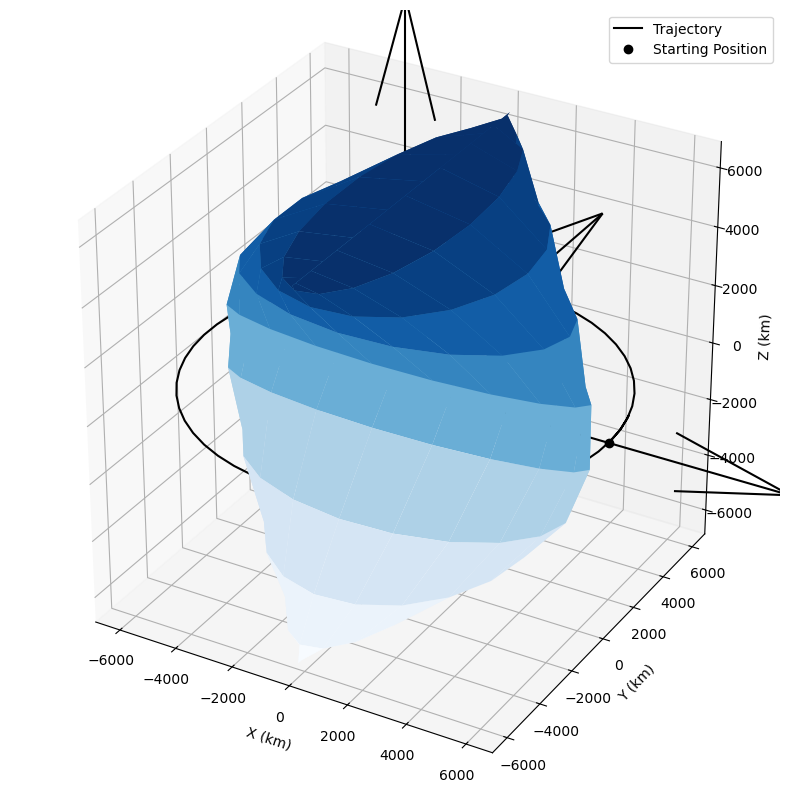

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

def plot(r):
    
    #3D plot
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    
    # plot trajectory and starting point
    ax.plot(r[:,0],r[:,1],r[:,2], 'k')
    ax.plot([r[0,0]],[r[0,1]],[r[0,2]], 'ko')
    
    r_plot=earth_radius
    
    # plot earth
    _u, _v = np.mgrid[0:2*np.pi:20j,0:np.pi:10j]
    _x=r_plot*np.cos(_u)*np.sin(_v)
    _y=r_plot*np.sin(_u)*np.sin(_v)
    _z=r_plot*np.cos(_v)
    ax.plot_surface(_x,_y,_z,cmap='Blues')
    
    l=r_plot*2.0
    x,y,z=[[0,0,0],[0,0,0],[0,0,0]]
    u,v,w=[[l,0,0],[0,l,0],[0,0,l]]
    ax.quiver(x,y,z,u,v,w,color='k')
    
    # check for custom axes limits
    max_val=np.max(np.abs(r))
    
    # set labels and title
    ax.set_xlim([-max_val,max_val])
    ax.set_ylim([-max_val,max_val])
    ax.set_zlim([-max_val,max_val])
    ax.set_xlabel('X (km)'); ax.set_ylabel('Y (km)'); ax.set_zlabel('Z (km)');
    ax.set_aspect('equal')
    plt.legend(['Trajectory', 'Starting Position'])
    
    plt.show()
    
earth_radius = 6378.0 # km
earth_mu=398600.0 # km^3 /s^2

def diffy_q(t,y,mu):
    # unpack state
    rx,ry,rz,vx,vy,vz = y
    r = np.array([rx,ry,rz])
    
    # norm of the radius vector
    norm_r = np.linalg.norm(r)
    
    # two body acceleration
    ax,ay,az = -r*mu/norm_r**3 #negative because it points to the center of the earth
    
    return [vx,vy,vz,ax,ay,az]

if __name__=='__main__':
    # initial conditions of orbit parameters
    r_mag = earth_radius + 500 # km
    v_mag = np.sqrt(earth_mu/r_mag) # km/s
    
    # initial position and velocity vectors
    r0 = [r_mag, 0, 0]
    v0 = [0, v_mag, 0]
    
    # timespan
    tspan=100*60.0
    
    # timestep
    dt=100.0
    
    # total number of steps
    n_steps = int(np.ceil(tspan/dt))
    
    # initialize arrays
    ys=np.zeros((n_steps, 6))
    ts=np.zeros((n_steps,1))
    
    # initial conditions
    y0 = r0 + v0 # it concatenates them
    ys[0] = np.array(y0)
    step=1
    
    # initiate solver
    solver=ode(diffy_q)
    solver.set_integrator('lsoda')
    solver.set_initial_value(y0,0)
    solver.set_f_params(earth_mu)
    
    # propagate the orbit
    while solver.successful() and step<n_steps:
        solver.integrate(solver.t+dt)
        ts[step]=solver.t
        ys[step]=solver.y
        step+=1
    
    rs=ys[:,:3]
    vs=ys[:,3:]
    
    plot(rs)